# Rf 3 0 8_Normintegration 2D
Multidimensional models: normalization and integration of p.d.fs, construction of cumulative distribution functions
from p.d.f.s in two dimensions



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:48 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooProdPdf.h"
#include "RooAbsReal.h"
#include "RooPlot.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH1.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Setup model
 ---------------------

Create observables x,y

In [3]:
RooRealVar x("x", "x", -10, 10);
RooRealVar y("y", "y", -10, 10);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create p.d.f. gaussx(x,-2,3), gaussy(y,2,2)

In [4]:
RooGaussian gx("gx", "gx", x, RooConst(-2), RooConst(3));
RooGaussian gy("gy", "gy", y, RooConst(+2), RooConst(2));

Create gxy = gx(x)*gy(y)

In [5]:
RooProdPdf gxy("gxy", "gxy", RooArgSet(gx, gy));

Retrieve raw & normalized values of roofit p.d.f.s
 --------------------------------------------------------------------------------------------------

Return 'raw' unnormalized value of gx

In [6]:
cout << "gxy = " << gxy.getVal() << endl;

gxy = 0.485672


Return value of gxy normalized over x _and_ y in range [-10,10]

In [7]:
RooArgSet nset_xy(x, y);
cout << "gx_Norm[x,y] = " << gxy.getVal(&nset_xy) << endl;

gx_Norm[x,y] = 0.0129332


Create object representing integral over gx
 which is used to calculate  gx_Norm[x,y] == gx / gx_Int[x,y]

In [8]:
RooAbsReal *igxy = gxy.createIntegral(RooArgSet(x, y));
cout << "gx_Int[x,y] = " << igxy->getVal() << endl;

gx_Int[x,y] = 37.5523


Nb: it is also possible to do the following

Return value of gxy normalized over x in range [-10,10] (i.e. treating y as parameter)

In [9]:
RooArgSet nset_x(x);
cout << "gx_Norm[x] = " << gxy.getVal(&nset_x) << endl;

gx_Norm[x] = 0.106896


Return value of gxy normalized over y in range [-10,10] (i.e. treating x as parameter)

In [10]:
RooArgSet nset_y(y);
cout << "gx_Norm[y] = " << gxy.getVal(&nset_y) << endl;

gx_Norm[y] = 0.120989


Integrate normalized pdf over subrange
 ----------------------------------------------------------------------------

Define a range named "signal" in x from -5,5

In [11]:
x.setRange("signal", -5, 5);
y.setRange("signal", -3, 3);

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'signal' created with bounds [-5,5]
[#1] INFO:Eval -- RooRealVar::setRange(y) new range named 'signal' created with bounds [-3,3]


Create an integral of gxy_norm[x,y] over x and y in range "signal"
 This is the fraction of of p.d.f. gxy_Norm[x,y] which is in the
 range named "signal"

In [12]:
RooAbsReal *igxy_sig = gxy.createIntegral(RooArgSet(x, y), NormSet(RooArgSet(x, y)), Range("signal"));
cout << "gx_Int[x,y|signal]_Norm[x,y] = " << igxy_sig->getVal() << endl;

gx_Int[x,y|signal]_Norm[x,y] = 0.572035


Construct cumulative distribution function from pdf
 -----------------------------------------------------------------------------------------------------

Create the cumulative distribution function of gx
 i.e. calculate Int[-10,x] gx(x') dx'

In [13]:
RooAbsReal *gxy_cdf = gxy.createCdf(RooArgSet(x, y));

Plot cdf of gx versus x

In [14]:
TH1 *hh_cdf = gxy_cdf->createHistogram("hh_cdf", x, Binning(40), YVar(y, Binning(40)));
hh_cdf->SetLineColor(kBlue);

new TCanvas("rf308_normintegration2d", "rf308_normintegration2d", 600, 600);
gPad->SetLeftMargin(0.15);
hh_cdf->GetZaxis()->SetTitleOffset(1.8);
hh_cdf->Draw("surf");

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(gxy_cdf_Int[x_prime,y_prime|CDF]_Norm[x_prime,y_prime]) WARNING extended mode requested for a non-pdf object, ignored


Draw all canvases 

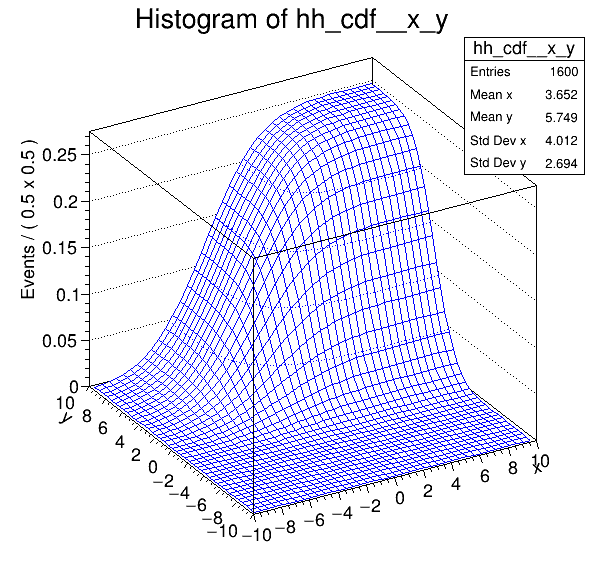

In [15]:
gROOT->GetListOfCanvases()->Draw()